In [3]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=in_shape)
# model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
______________________________________

In [5]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

hist = model.fit(X_train, y_train, 
    batch_size=32, epochs=50, #epochs=50
    verbose=1,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

model.save_weights('cifar10-cnn-weight.h5')

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Accuracy')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Loss')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
15168/50000 [========>.....................] - ETA: 1:24 - loss: 1.9130 - accuracy: 0.2825

KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import img_to_array, load_img

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
im_size = 32 * 32 * 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 학습률 중에서 얼마나 버릴 건지. 다 학습하지말고 25%는 버리겠다

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

10000/10000 [==============================] - 4s 378us/step
정답률= 0.7843999862670898 loss= 0.7014135311126709

predict_classes= [0]


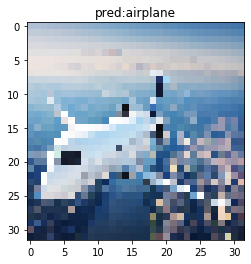

In [10]:
model.load_weights('cifar10-cnn-weight.h5')
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

#model.summary()

score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# img_pred=model.predict_classes(X_test)

# plt.figure(figsize=(10,10))
# for i in range(1):
#     rand_num=np.random.randint(0,10000)
#     cifar_img=plt.subplot(5,5,i+1)
#     plt.imshow(X_test[rand_num])
#     plt.tick_params(labelbottom='off')
#     plt.tick_params(labelleft='off')
#     plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num], y_test[rand_num]))

# plt.show()

temp_img=load_img("test-airplane.png",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()



predict_classes= [8]


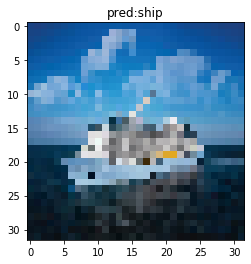

In [12]:
temp_img=load_img("test-ship.jpg",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()



predict_classes= [1]


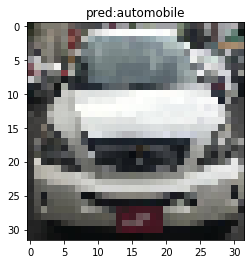

In [13]:
temp_img=load_img("test-car.png",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()



predict_classes= [6]


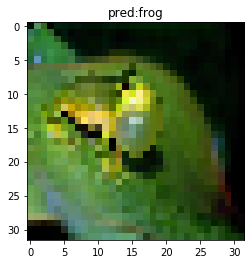

In [15]:
temp_img=load_img("test-frog.jpg",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()


predict_classes= [7]


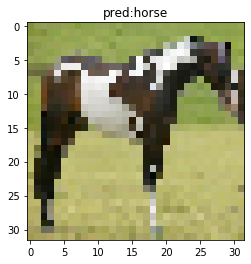

In [16]:
temp_img=load_img("test-horse.jpg",target_size=(32,32))

#화상을 배열로 변환
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=', img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(labels[img_pred[0]]))
plt.show()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 1)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error',optimizer=sgd)
model.fit(x_train,y_train,epochs=2000)

SyntaxError: invalid syntax (<ipython-input-9-eebb10e45792>, line 4)